<a href="https://colab.research.google.com/github/lfa-systems/Alura_Store_BR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [193]:
loja1 = loja # Padronizar o nome da loja com os demais

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
dados = [loja1,loja2,loja3,loja4]

def faturamento(loja):
  faturamento = loja["Preço"].sum()
  return faturamento

faturamentos = []
for i in dados:
  faturamentos.append(faturamento(i))


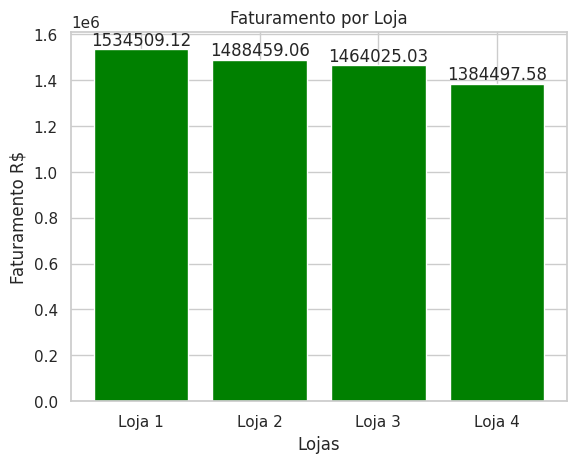

In [194]:
plt.xlabel('Lojas')
plt.ylabel('Faturamento R$')
plt.title('Faturamento por Loja')
barras = plt.bar(lojas, faturamentos, color='green')
plt.bar_label(barras, fmt='%.2f', label_type='edge' )
plt.show()




# 2. Vendas por Categoria


In [195]:
categorias_mais_populares = []

def categoria_mais_popular(loja):
  vendas_por_categoria = loja.groupby('Categoria do Produto')['Produto'].count().reset_index()
  categorias_mais_populares = vendas_por_categoria.sort_values(by='Produto', ascending=False)
  return categorias_mais_populares

for i in dados:
  categorias_mais_populares.append(categoria_mais_popular(i))
categorias_mais_populares

[    Categoria do Produto  Produto
 6                 moveis      465
 2            eletronicos      448
 0             brinquedos      324
 1       eletrodomesticos      312
 3        esporte e lazer      284
 4  instrumentos musicais      182
 5                 livros      173
 7  utilidades domesticas      171,
     Categoria do Produto  Produto
 6                 moveis      442
 2            eletronicos      422
 0             brinquedos      313
 1       eletrodomesticos      305
 3        esporte e lazer      275
 4  instrumentos musicais      224
 5                 livros      197
 7  utilidades domesticas      181,
     Categoria do Produto  Produto
 6                 moveis      499
 2            eletronicos      451
 0             brinquedos      315
 1       eletrodomesticos      278
 3        esporte e lazer      277
 5                 livros      185
 4  instrumentos musicais      177
 7  utilidades domesticas      177,
     Categoria do Produto  Produto
 6               

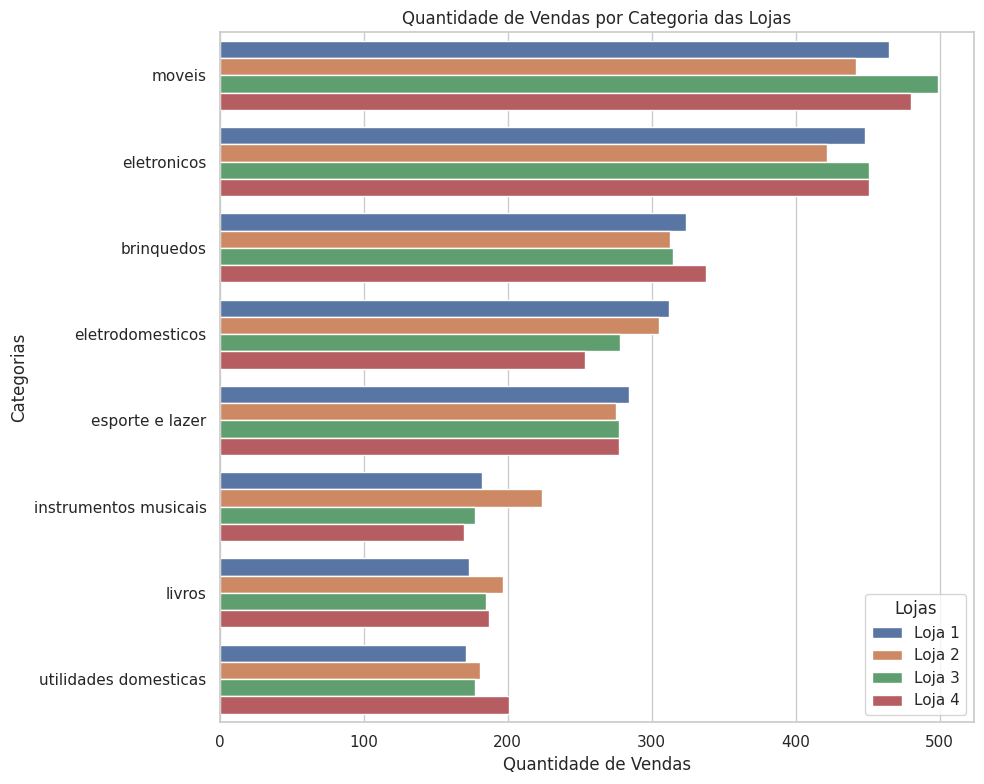

In [196]:
dadosGrafico = {}
def df_lojas():
  data = []
  for loja in lojas:
    for i in range(len(categorias_mais_populares[0]['Produto'])):
        data.append(loja)
  dadosGrafico['Loja'] = data

def df_dados(chave, lista, dados):
  data = []
  for loja in range(len(lojas)):
    for dado in lista[loja][dados]:
        data.append(dado)
  dadosGrafico[chave] = data

df_lojas()

df_dados('Categoria', categorias_mais_populares,'Categoria do Produto')
df_dados('Quantidade', categorias_mais_populares,'Produto')

df_vendas = pd.DataFrame(dadosGrafico)
plt.figure(figsize=(10, 8))
sns.barplot(x='Quantidade', y='Categoria', hue='Loja', data=df_vendas, orient='h')

plt.title('Quantidade de Vendas por Categoria das Lojas')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Categorias')
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [197]:
avaliacao_loja = []
for loja in dados:
  avaliacao_loja.append(float( '%.2f' % loja["Avaliação da compra"].mean()))

print(avaliacao_loja)

[3.98, 4.04, 4.05, 4.0]


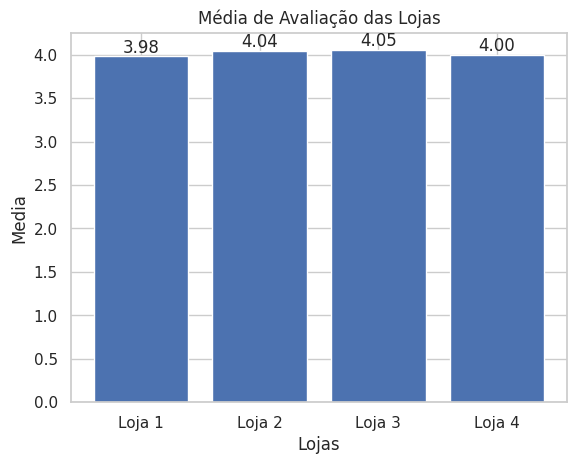

In [198]:
plt.xlabel('Lojas')
plt.ylabel('Media')
plt.title('Média de Avaliação das Lojas')
barras = plt.bar(lojas, avaliacao_loja)
plt.bar_label(barras, fmt='%.2f', label_type='edge' )
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [199]:
vendas_por_produto_l1 = loja1['Produto'].value_counts().reset_index()
vendas_por_produto_l1.columns = ['produto', 'quantidade']
mais_vendido_l1 = vendas_por_produto_l1.iloc[0]
menos_vendido_l1 = vendas_por_produto_l1.iloc[-1]
mais_vendido_l1 = mais_vendido_l1.to_dict()
menos_vendido_l1 = menos_vendido_l1.to_dict()

vendas_por_produto_l2 = loja2['Produto'].value_counts().reset_index()
vendas_por_produto_l2.columns = ['produto', 'quantidade']
mais_vendido_l2 = vendas_por_produto_l2.iloc[0]
menos_vendido_l2 = vendas_por_produto_l2.iloc[-1]
mais_vendido_l2 = mais_vendido_l2.to_dict()
menos_vendido_l2 = menos_vendido_l2.to_dict()

vendas_por_produto_l3 = loja3['Produto'].value_counts().reset_index()
vendas_por_produto_l3.columns = ['produto', 'quantidade']
mais_vendido_l3 = vendas_por_produto_l3.iloc[0]
menos_vendido_l3 = vendas_por_produto_l3.iloc[-1]
mais_vendido_l3 = mais_vendido_l3.to_dict()
menos_vendido_l3 = menos_vendido_l3.to_dict()

vendas_por_produto_l4 = loja4['Produto'].value_counts().reset_index()
vendas_por_produto_l4.columns = ['produto', 'quantidade']
mais_vendido_l4 = vendas_por_produto_l4.iloc[0]
menos_vendido_l4 = vendas_por_produto_l4.iloc[-1]
mais_vendido_l4 = mais_vendido_l4.to_dict()
menos_vendido_l4 = menos_vendido_l4.to_dict()

print('>>> Loja 1 <<<')
print("Mais vendido:", mais_vendido_l1)
print("Menos vendido:", menos_vendido_l1)

print('>>> Loja 2 <<<')
print("Mais vendido:", mais_vendido_l2)
print("Menos vendido:", menos_vendido_l2)

print('>>> Loja 3 <<<')
print("Mais vendido:", mais_vendido_l3)
print("Menos vendido:", menos_vendido_l3)

print('>>> Loja 4 <<<')
print("Mais vendido:", mais_vendido_l4)
print("Menos vendido:", menos_vendido_l4)

>>> Loja 1 <<<
Mais vendido: {'produto': 'Micro-ondas', 'quantidade': 60}
Menos vendido: {'produto': 'Celular ABXY', 'quantidade': 33}
>>> Loja 2 <<<
Mais vendido: {'produto': 'Iniciando em programação', 'quantidade': 65}
Menos vendido: {'produto': 'Jogo de tabuleiro', 'quantidade': 32}
>>> Loja 3 <<<
Mais vendido: {'produto': 'Kit banquetas', 'quantidade': 57}
Menos vendido: {'produto': 'Blocos de montar', 'quantidade': 35}
>>> Loja 4 <<<
Mais vendido: {'produto': 'Cama box', 'quantidade': 62}
Menos vendido: {'produto': 'Guitarra', 'quantidade': 33}


# 5. Frete Médio por Loja


In [200]:
media_frete_l1 = loja1["Frete"].mean()
media_frete_l2 = loja2["Frete"].mean()
media_frete_l3 = loja3["Frete"].mean()
media_frete_l4 = loja4["Frete"].mean()

print(media_frete_l1.round(2).item(), media_frete_l2.round(2).item(), media_frete_l3.round(2).item(), media_frete_l4.round(2).item())

34.69 33.62 33.07 31.28
